In [1]:
# CPILFESL: CPI less food and energy
# DTB3: 3-Month Treasury Bill Secondary Market Rate, Discount Basis
# GDP: Gross Domestic Product
# GEPUPPP: Global Economic Policy Uncertainty Index: PPP-Adjusted GDP
# IURSA: Insured Unemployment Rate
# REAINTRATREARAT10Y: 10-Year Real Interest Rate
# T5YIE: 5-Year Breakeven Inflation Rate
# T10Y3M: 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
# T10YIE: 10-Year Breakeven Inflation Rate
# UNRATE: Unemployment Rate
# USACPIALLMINMEI: Consumer Price Index: All Items for the United States
# BOPGSTB: Trade Balance: Goods and Services, Balance of Payments Basis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [3]:
# Set directory
direction = 'C:/Users/Zhiyuan/data/'

## get and plot data

In [4]:
# Bitcoin price
bitcoin_price = pd.read_excel(direction + 'bitcoin price.xlsx')
bitcoin_price = bitcoin_price.set_index('Date')
bitcoin_price

,Last Price
Date,
2022-12-18,16699.14
2022-12-17,16718.50
2022-12-16,16837.95
2022-12-15,17399.63
2022-12-14,17828.90
...,...
2010-07-23,0.06
2010-07-22,0.05
2010-07-21,0.08


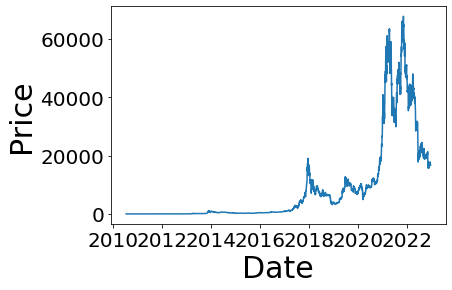

In [5]:
# plot Bitcoin price
fig, ax = plt.subplots()

ax.plot(bitcoin_price)

ax.set_ylabel('Price',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

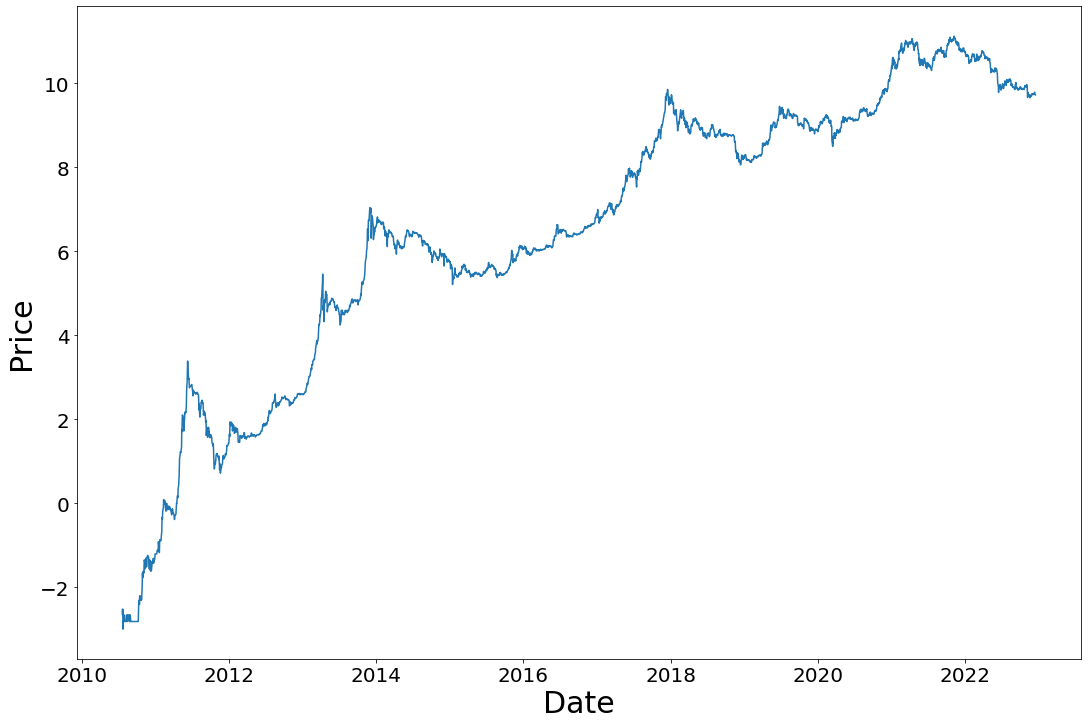

In [6]:
# take log of the price
ln_bitcoin_price = np.log(bitcoin_price)
ln_bitcoin_price.columns = ['ln_bitcoin_price']

fig, ax = plt.subplots()

ax.plot(ln_bitcoin_price)

ax.set_ylabel('Price',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

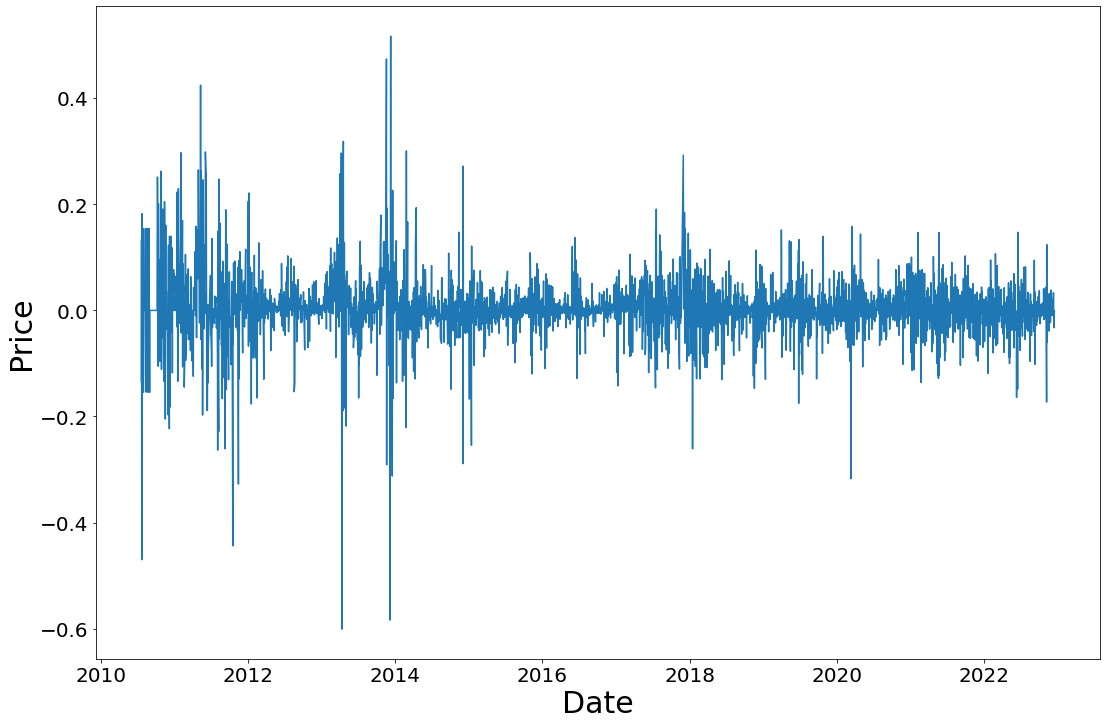

In [7]:
# take log return of the price
ln_bitcoin_return = np.log(bitcoin_price/bitcoin_price.shift(-1))
ln_bitcoin_return.columns = ['ln_bitcoin_return']

fig, ax = plt.subplots()

ax.plot(ln_bitcoin_return)

ax.set_ylabel('Price',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [8]:
# S&P 500 index
sp500 = pd.read_excel(direction + 's&p 500.xlsx')
sp500 = sp500.set_index('Date')[['Last Price']]
sp500.columns = ['sp500']
sp500

,sp500
Date,
2022-12-20,3830.81
2022-12-19,3817.66
2022-12-16,3852.36
2022-12-15,3895.75
2022-12-14,3995.32
...,...
2009-12-04,1105.98
2009-12-03,1099.92
2009-12-02,1109.23


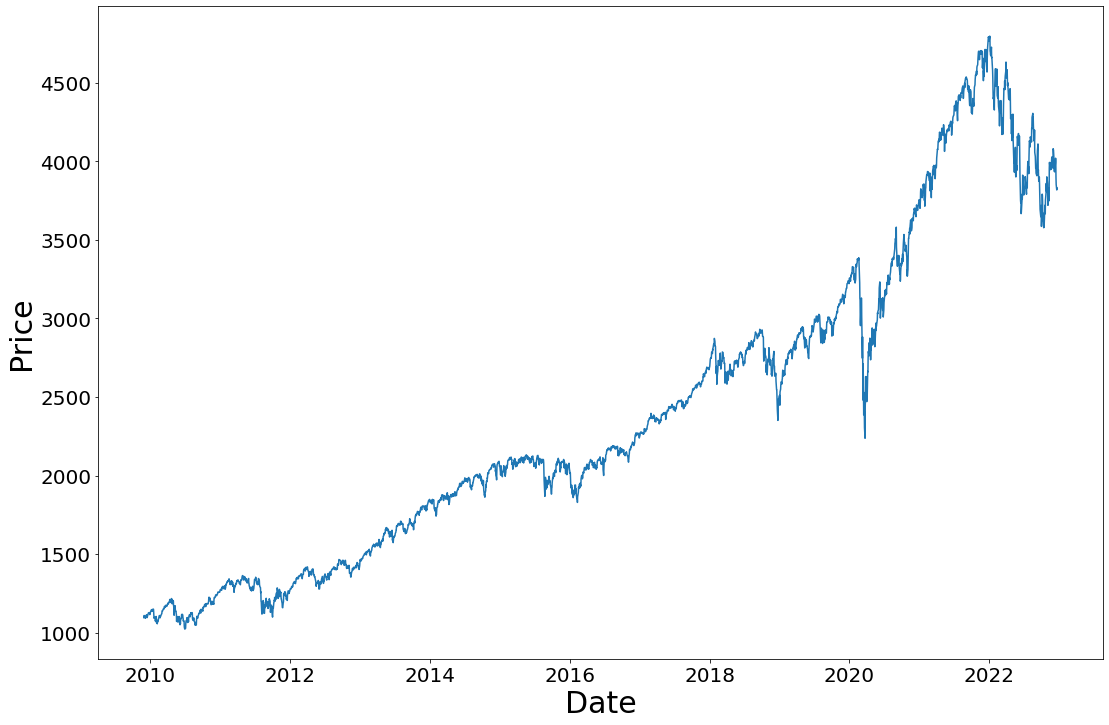

In [9]:
# plot of S&P 500 index
fig, ax = plt.subplots()

ax.plot(sp500)

ax.set_ylabel('Price',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

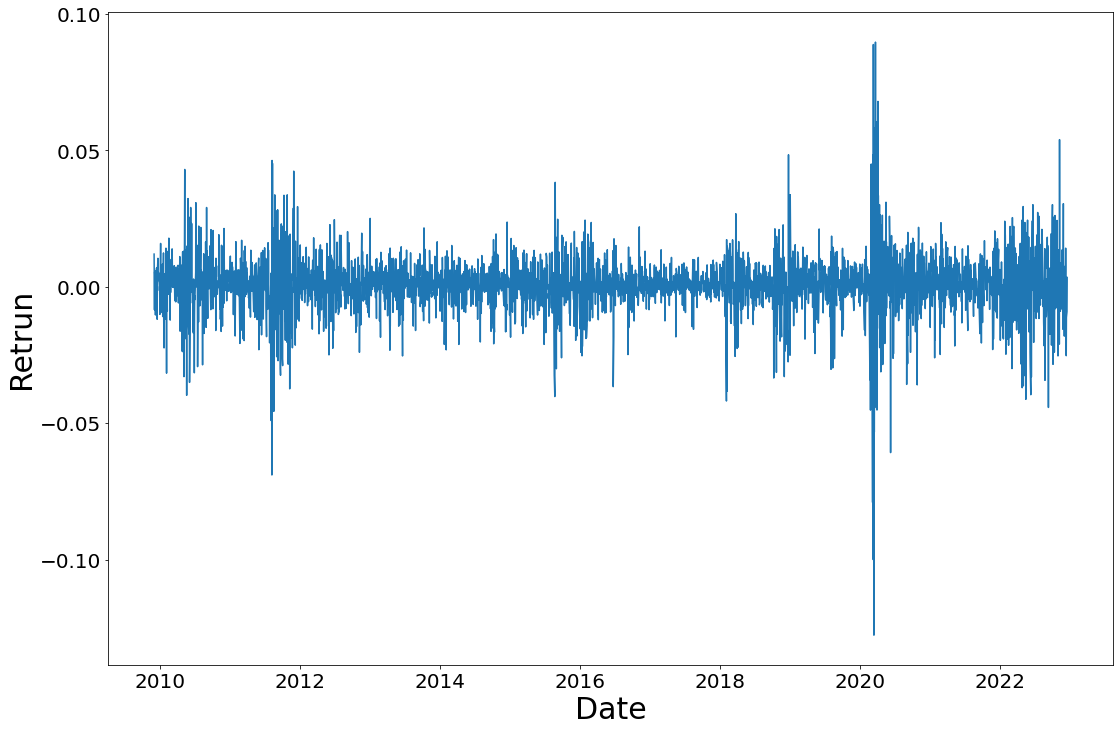

In [10]:
# take log return of the S&P 500 index
sp500_return = np.log(sp500/sp500.shift(-1))
sp500_return.columns = ['sp500_return']

fig, ax = plt.subplots()

ax.plot(sp500_return)

ax.set_ylabel('Retrun',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [11]:
# GDP data
GDP = pd.read_csv(direction + 'GDP.csv')
GDP = GDP.set_index('DATE')

date = list(GDP.index)
date = pd.to_datetime(date)
GDP.index = date

GDP

,GDP
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2021-07-01,23550.420
2021-10-01,24349.121
2022-01-01,24740.480
2022-04-01,25248.476


In [12]:
# calculate GDP growth rate
GDP_growth = np.log(GDP/GDP.shift())[1:]
GDP_growth.columns = ['GDP_growth']
GDP_growth

,GDP_growth
1947-04-01,0.011465
1947-07-01,0.014598
1947-10-01,0.039901
1948-01-01,0.022826
1948-04-01,0.025359
...,...
2021-07-01,0.021611
2021-10-01,0.033352
2022-01-01,0.015945
2022-04-01,0.020325


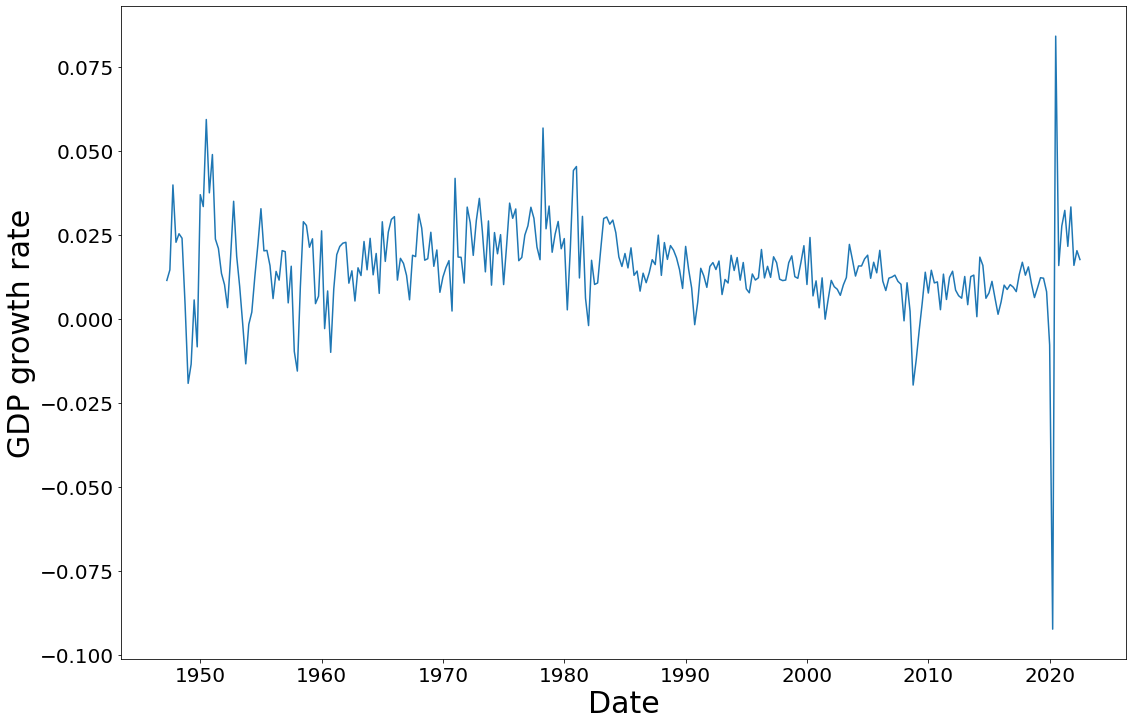

In [13]:
# plot GDP growth rate
fig, ax = plt.subplots()

ax.plot(GDP_growth)

ax.set_ylabel('GDP growth rate',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [14]:
# short-term risk-free interest rate
DTB3 = pd.read_csv(direction + 'DTB3.csv')
DTB3 = DTB3.set_index('DATE')
DTB3['DTB3'] = pd.to_numeric(DTB3['DTB3'],errors='coerce')
DTB3.fillna(method='ffill', inplace=True)

DTB3.index = pd.to_datetime(list(DTB3.index))

DTB3

,DTB3
1954-01-04,1.33
1954-01-05,1.28
1954-01-06,1.28
1954-01-07,1.31
1954-01-08,1.31
...,...
2022-12-09,4.19
2022-12-12,4.29
2022-12-13,4.26
2022-12-14,4.23


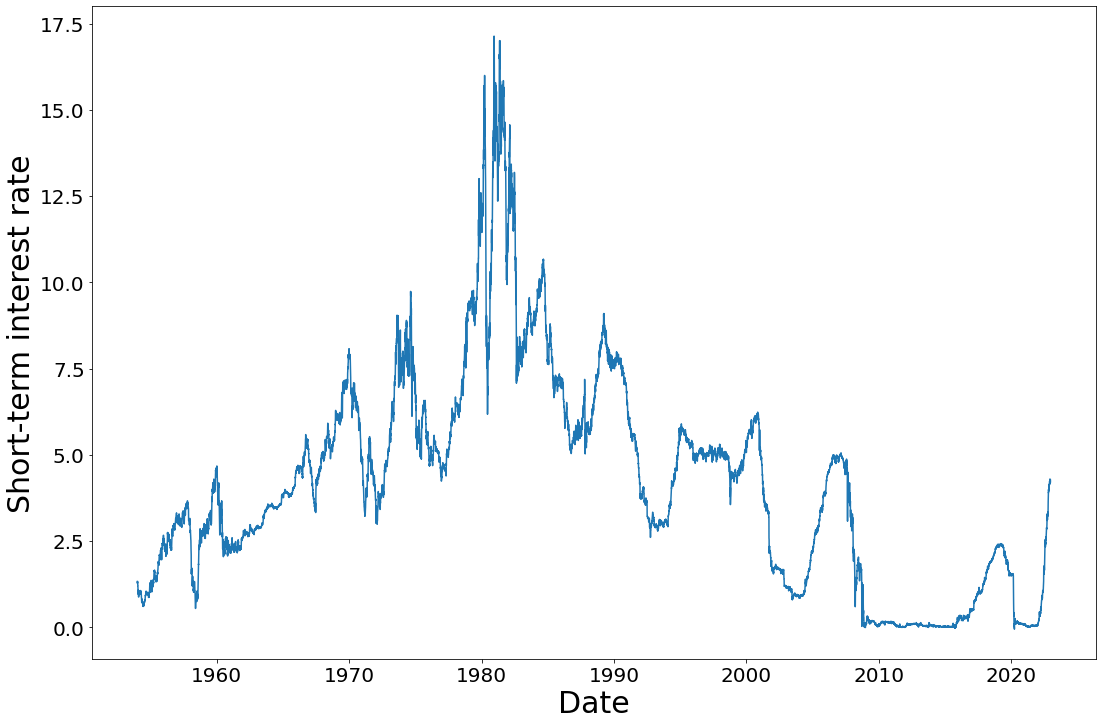

In [15]:
# plot short-term risk-free interest rate
fig, ax = plt.subplots()

ax.plot(DTB3)

ax.set_ylabel('Short-term interest rate',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [16]:
# difference between long-term risk-free interest rate and short-term risk-free interest rate
T10Y3M = pd.read_csv(direction + 'T10Y3M.csv')
T10Y3M = T10Y3M.set_index('DATE')
T10Y3M['T10Y3M'] = pd.to_numeric(T10Y3M['T10Y3M'],errors='coerce')
T10Y3M.fillna(method='ffill', inplace=True)

T10Y3M.index = pd.to_datetime(list(T10Y3M.index))

T10Y3M

,T10Y3M
1982-01-04,2.32
1982-01-05,2.24
1982-01-06,2.43
1982-01-07,2.46
1982-01-08,2.50
...,...
2022-12-12,-0.77
2022-12-13,-0.84
2022-12-14,-0.84
2022-12-15,-0.90


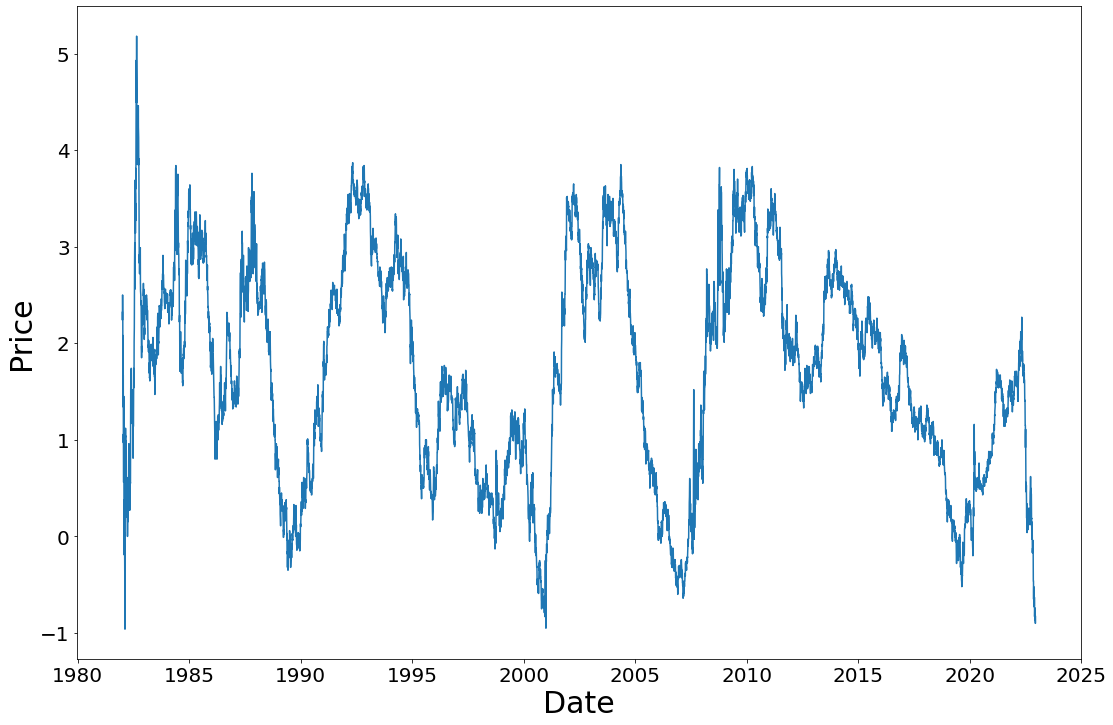

In [17]:
# plot of the difference between long-term risk-free interest rate and short-term risk-free interest rate
fig, ax = plt.subplots()

ax.plot(T10Y3M)

ax.set_ylabel('Price',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [18]:
# unemployment rate
UNRATE = pd.read_csv(direction + 'UNRATE.csv')
UNRATE = UNRATE.set_index('DATE')
UNRATE.fillna(method='ffill', inplace=True)

UNRATE.index = pd.to_datetime(list(UNRATE.index))

UNRATE

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-07-01,3.5
2022-08-01,3.7
2022-09-01,3.5
2022-10-01,3.7


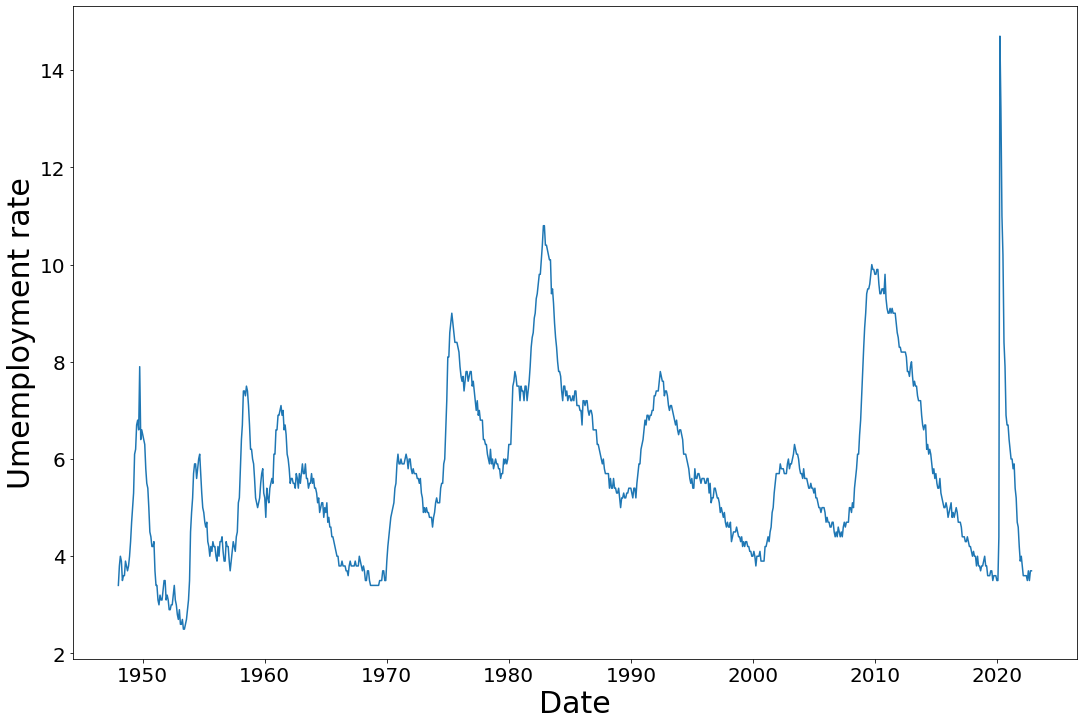

In [19]:
# plot of unemployment rate
fig, ax = plt.subplots()

ax.plot(UNRATE)

ax.set_ylabel('Umemployment rate',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [20]:
# inflation rate denoted by logrithm of the ratio of CPI and previous CPI
USACPIALLMINMEI = pd.read_csv(direction + 'USACPIALLMINMEI.csv')
USACPIALLMINMEI = USACPIALLMINMEI.set_index('DATE')
USACPIALLMINMEI.fillna(method='ffill', inplace=True)
inflation_rate = np.log(USACPIALLMINMEI/USACPIALLMINMEI.shift())[1:]
inflation_rate.columns = ['inflation_rate']

USACPIALLMINMEI.index = pd.to_datetime(list(USACPIALLMINMEI.index))
inflation_rate.index = pd.to_datetime(list(inflation_rate.index))

inflation_rate

,inflation_rate
1960-02-01,0.003407
1960-03-01,0.000000
1960-04-01,0.003396
1960-05-01,0.000000
1960-06-01,0.003384
...,...
2022-05-01,0.010963
2022-06-01,0.013643
2022-07-01,-0.000118
2022-08-01,-0.000354


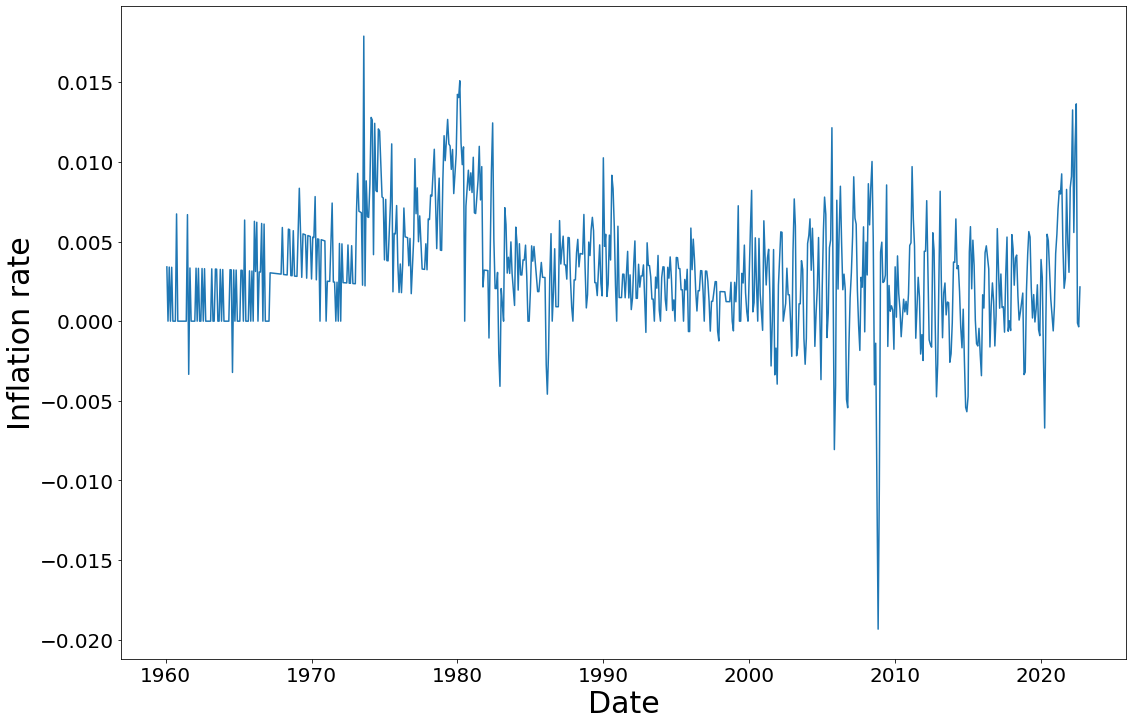

In [21]:
# plot of inflation rate
fig, ax = plt.subplots()

ax.plot(inflation_rate)

ax.set_ylabel('Inflation rate',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [22]:
# balance of payment
BOPGSTB = pd.read_csv(direction + 'BOPGSTB.csv')
BOPGSTB = BOPGSTB.set_index('DATE')
BOPGSTB.fillna(method='ffill', inplace=True)
BOPGSTB.index = pd.to_datetime(list(BOPGSTB.index))
BOPGSTB

,BOPGSTB
1992-01-01,-2026.0
1992-02-01,-831.0
1992-03-01,-2641.0
1992-04-01,-3109.0
1992-05-01,-3919.0
...,...
2022-06-01,-80724.0
2022-07-01,-70700.0
2022-08-01,-65770.0
2022-09-01,-74128.0


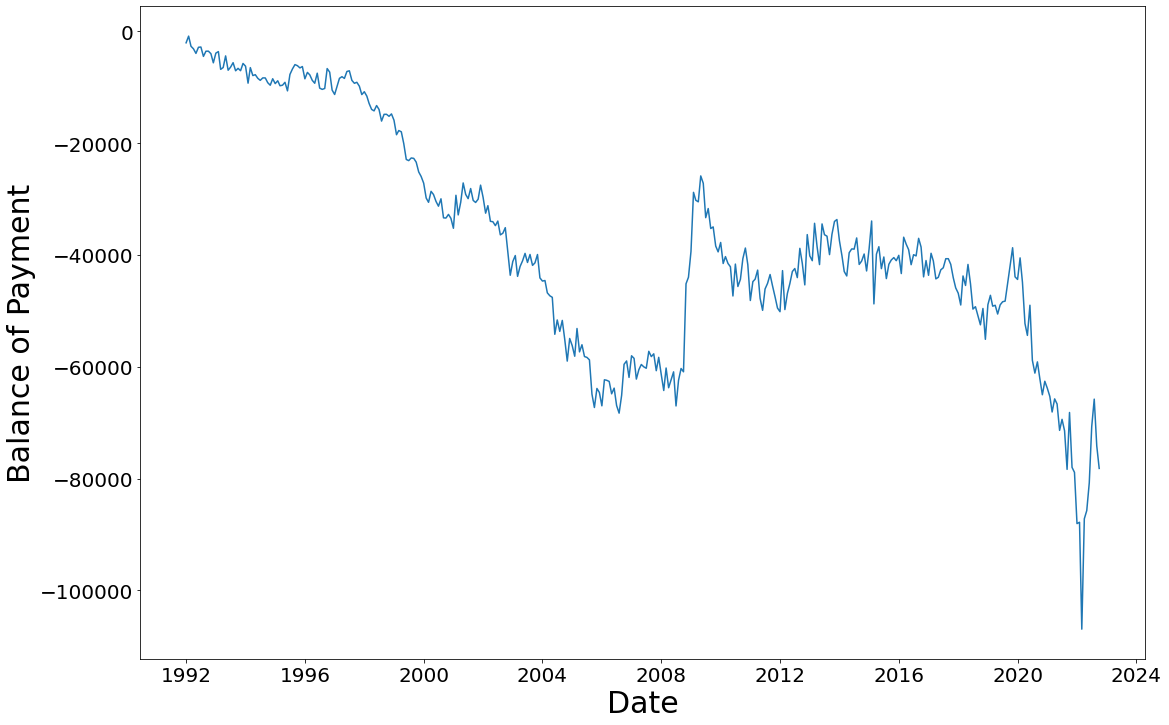

In [23]:
# plot of balance of payment
fig, ax = plt.subplots()
ax.plot(BOPGSTB)
ax.set_ylabel('Balance of Payment',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

# put data together and do preprocessing

In [53]:
# put data together
df_X = pd.concat([bitcoin_price,ln_bitcoin_price,ln_bitcoin_return,ln_bitcoin_return.shift(-1),ln_bitcoin_return.shift(-2),ln_bitcoin_return.shift(-3),ln_bitcoin_return.shift(-4),ln_bitcoin_return.shift(-5),sp500, GDP,GDP_growth,DTB3,T10Y3M,UNRATE,USACPIALLMINMEI,inflation_rate,BOPGSTB],axis = 1)

In [54]:
df_X.to_csv('df_X.csv')

In [25]:
# rename acolumns
df_X.columns = ['Last Price','ln_bitcoin_price','ln_bitcoin_return','ln_bitcoin_return-1','ln_bitcoin_return-2','ln_bitcoin_return-3','ln_bitcoin_return-4','ln_bitcoin_return-5','sp500','sp500_return','GDP','GDP_growth','DTB3','T10Y3M','UNRATE','USACPIALLMINMEI','inflation_rate','BOPGSTB']

In [26]:
df_X

,Last Price,ln_bitcoin_price,ln_bitcoin_return,ln_bitcoin_return-1,ln_bitcoin_return-2,ln_bitcoin_return-3,ln_bitcoin_return-4,ln_bitcoin_return-5,sp500,sp500_return,GDP,GDP_growth,DTB3,T10Y3M,UNRATE,USACPIALLMINMEI,inflation_rate,BOPGSTB
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.968,0.011465,NaN,NaN,NaN,NaN,NaN,NaN
1947-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.585,0.014598,NaN,NaN,NaN,NaN,NaN,NaN
1947-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.745,0.039901,NaN,NaN,NaN,NaN,NaN,NaN
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.742,0.022826,NaN,NaN,3.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,16837.95,9.731391,-0.032814,-0.024372,0.003759,0.033445,0.003640,-0.000816,3852.36,-0.011200,NaN,NaN,NaN,-0.83,NaN,NaN,NaN,NaN
2022-12-17,16718.50,9.724271,-0.007119,-0.032814,-0.024372,0.003759,0.033445,0.003640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-18,16699.14,9.723113,-0.001159,-0.007119,-0.032814,-0.024372,0.003759,0.033445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3817.66,-0.009048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# fill in nan value (each day take the latest value at that time)
df_X = df_X.fillna(method = 'ffill')

In [28]:
# We only consider data from the start time of bitcoin price. The last two days only have S&P 500 data.
df_X = df_X[~np.isnan(df_X['ln_bitcoin_return-5'])][:-2]

In [29]:
# calculate 10-year risk-free interest rate
df_X['T10'] = df_X['T10Y3M'] + df_X['DTB3']

In [30]:
df_X.to_csv('df_X.csv')

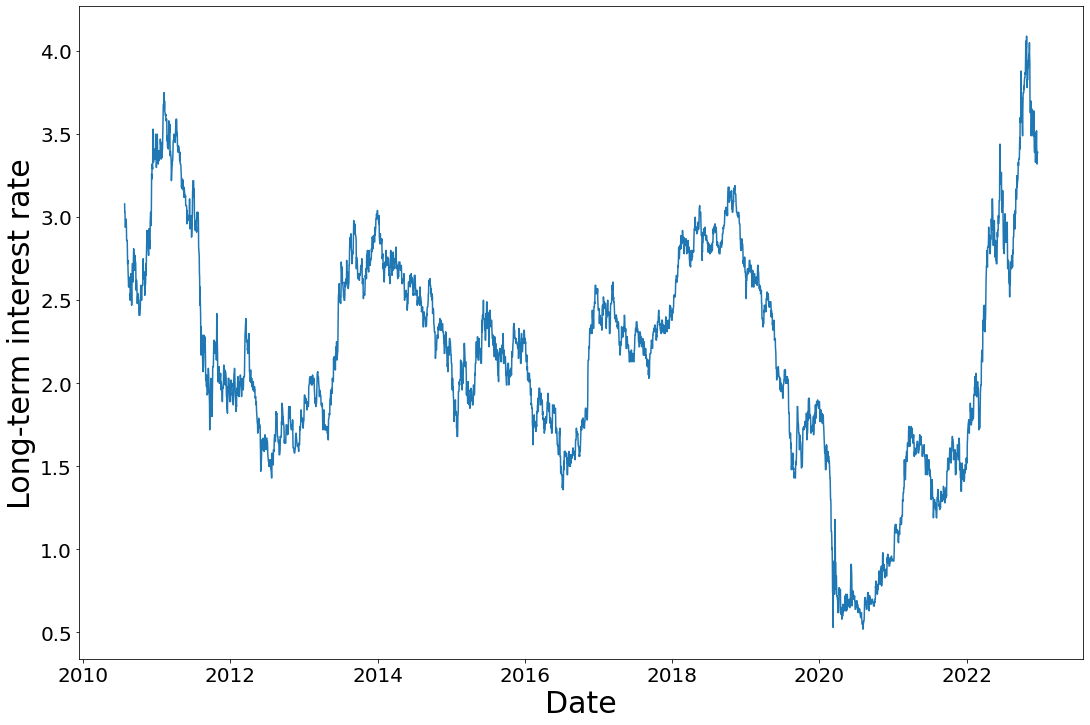

In [31]:
# plot 10-year risk-free interest rate
fig, ax = plt.subplots()

ax.plot(df_X['T10'])

ax.set_ylabel('Long-term interest rate',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [32]:
# calculate Spearman correlation coefficient
df_X.corr(method='spearman')

,Last Price,ln_bitcoin_price,ln_bitcoin_return,ln_bitcoin_return-1,ln_bitcoin_return-2,ln_bitcoin_return-3,ln_bitcoin_return-4,ln_bitcoin_return-5,sp500,sp500_return,GDP,GDP_growth,DTB3,T10Y3M,UNRATE,USACPIALLMINMEI,inflation_rate,BOPGSTB,T10
Last Price,1.000000,1.000000,-0.038231,-0.035620,-0.037925,-0.037678,-0.032063,-0.032935,0.969322,0.011042,0.955754,0.546029,0.372231,-0.648833,-0.601656,0.963208,0.292426,-0.656248,-0.239156
ln_bitcoin_price,1.000000,1.000000,-0.038231,-0.035620,-0.037925,-0.037678,-0.032063,-0.032935,0.969322,0.011042,0.955754,0.546029,0.372231,-0.648833,-0.601656,0.963208,0.292426,-0.656248,-0.239156
ln_bitcoin_return,-0.038231,-0.038231,1.000000,0.024799,0.010277,0.050382,0.054607,0.036661,-0.043630,0.108570,-0.050848,0.013469,-0.013618,0.018678,0.060287,-0.052160,-0.006626,0.043068,-0.028988
ln_bitcoin_return-1,-0.035620,-0.035620,0.024799,1.000000,0.024343,0.014873,0.052342,0.060300,-0.041957,0.038010,-0.048307,0.009375,-0.008852,0.015177,0.056000,-0.051060,-0.016480,0.039845,-0.020974
ln_bitcoin_return-2,-0.037925,-0.037925,0.010277,0.024343,1.000000,0.021980,0.019444,0.048496,-0.044936,0.031523,-0.052579,0.013006,-0.008041,0.016915,0.058371,-0.055009,-0.017954,0.040368,-0.019871
ln_bitcoin_return-3,-0.037678,-0.037678,0.050382,0.014873,0.021980,1.000000,0.020399,0.011760,-0.042303,0.023437,-0.049637,0.001038,-0.010702,0.018473,0.057032,-0.052389,-0.010225,0.038915,-0.020161
ln_bitcoin_return-4,-0.032063,-0.032063,0.054607,0.052342,0.019444,0.020399,1.000000,0.033756,-0.037148,0.019019,-0.044810,0.007065,0.003929,0.010865,0.048727,-0.047512,-0.011028,0.035524,-0.017845
ln_bitcoin_return-5,-0.032935,-0.032935,0.036661,0.060300,0.048496,0.011760,0.033756,1.000000,-0.039575,0.003303,-0.048575,0.006058,-0.001170,0.015088,0.051398,-0.050537,-0.007734,0.036605,-0.019599
sp500,0.969322,0.969322,-0.043630,-0.041957,-0.044936,-0.042303,-0.037148,-0.039575,1.000000,0.017023,0.979359,0.504272,0.394860,-0.682320,-0.638849,0.981407,0.297480,-0.669899,-0.263779
sp500_return,0.011042,0.011042,0.108570,0.038010,0.031523,0.023437,0.019019,0.003303,0.017023,1.000000,-0.005470,0.024342,-0.019823,-0.005656,0.047746,-0.001389,0.019993,0.006205,-0.025140


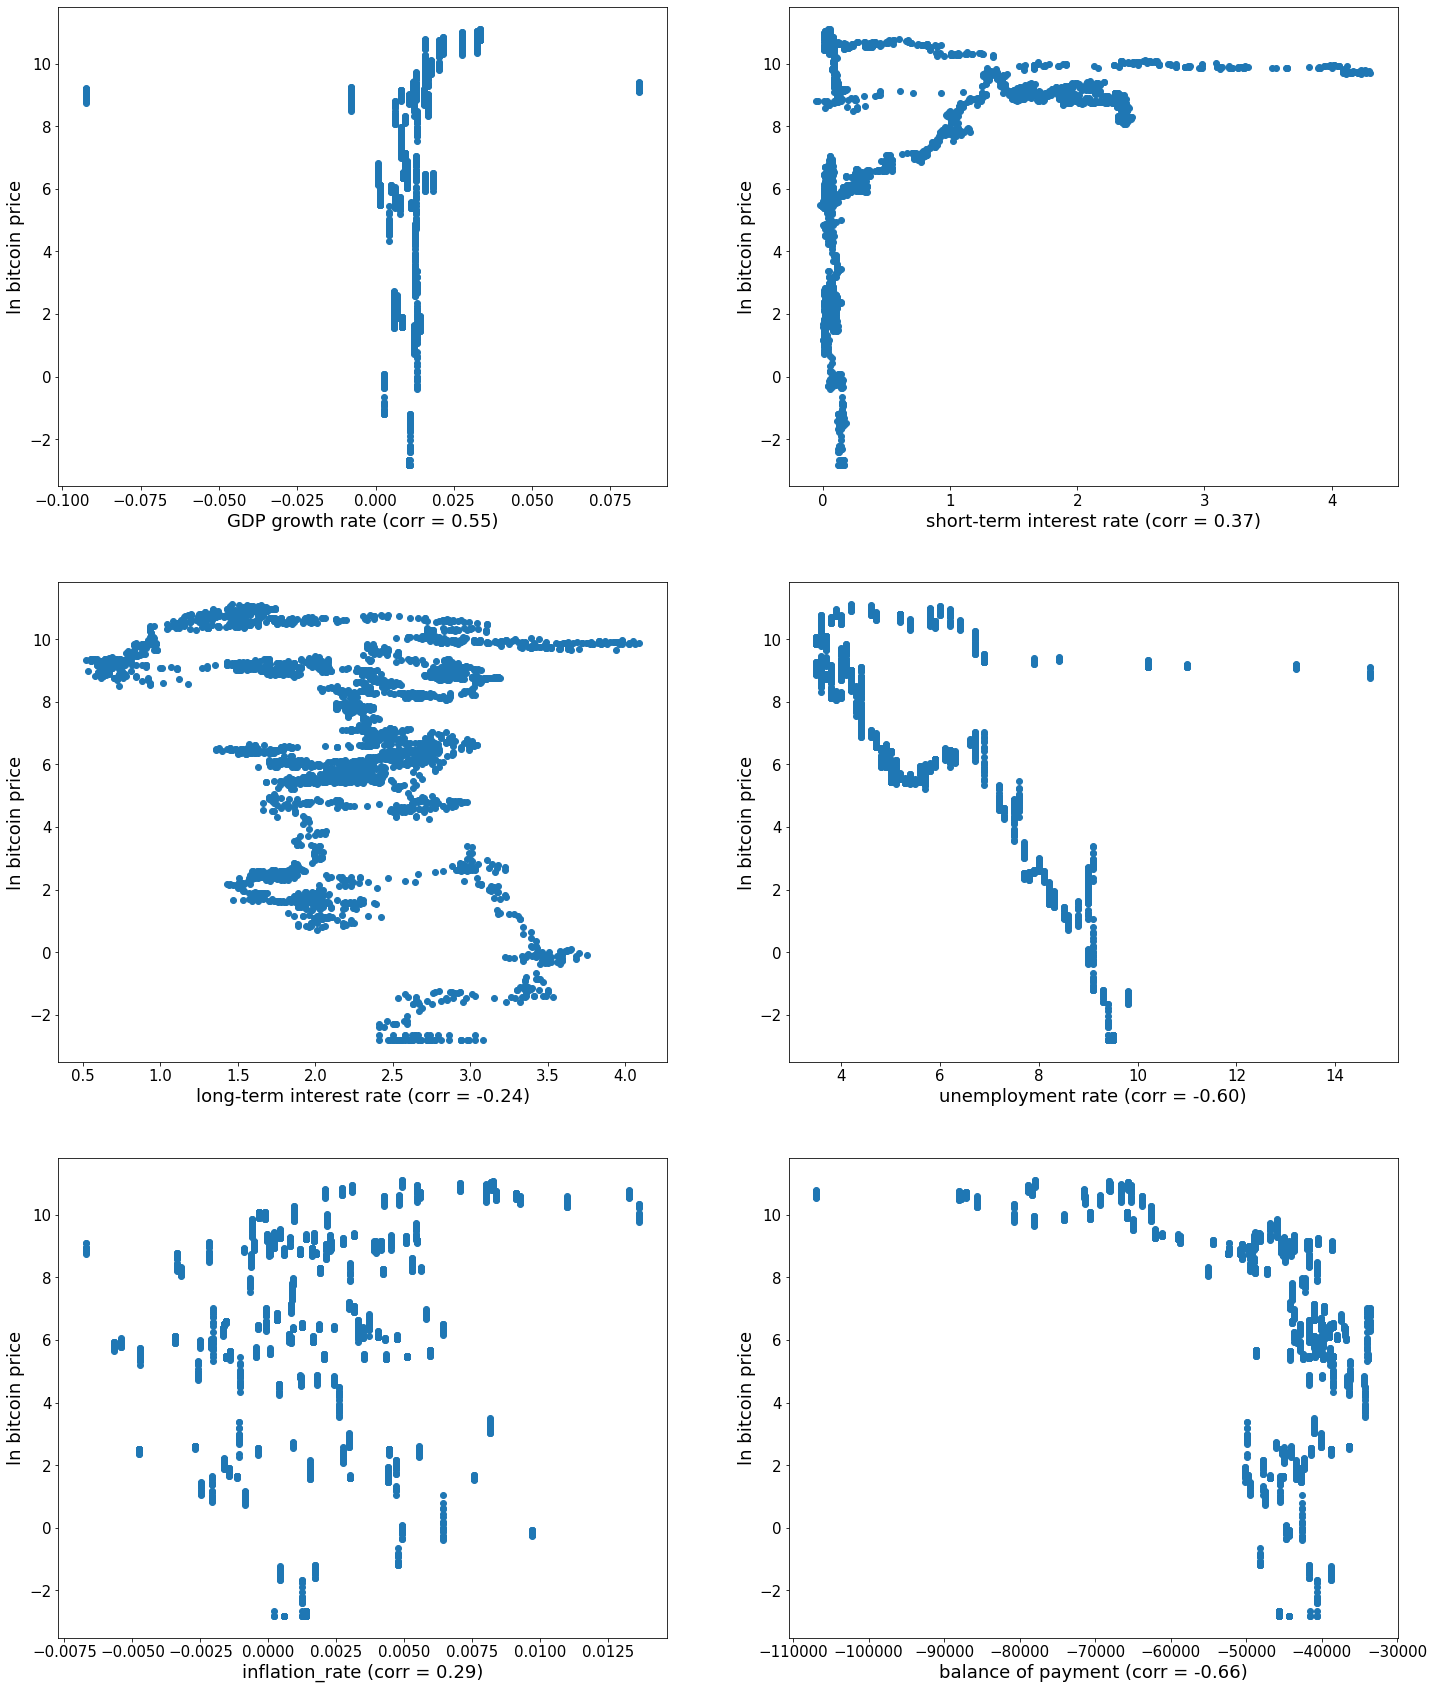

In [33]:
# plot correlation graph
plt.rcParams.update({'figure.figsize':(24,30)})
fig, axes = plt.subplots(3, 2)

axes[0,0].plot(df_X['GDP_growth'],df_X['ln_bitcoin_price'],'o')
axes[0,0].set_ylabel('ln bitcoin price',fontsize = 18)
axes[0,0].set_xlabel('GDP growth rate (corr = 0.55)',fontsize = 18)
axes[0,0].xaxis.set_tick_params(labelsize=15)
axes[0,0].yaxis.set_tick_params(labelsize=15)

axes[0,1].plot(df_X['DTB3'],df_X['ln_bitcoin_price'],'o')
axes[0,1].set_ylabel('ln bitcoin price',fontsize = 18)
axes[0,1].set_xlabel('short-term interest rate (corr = 0.37)',fontsize = 18)
axes[0,1].xaxis.set_tick_params(labelsize=15)
axes[0,1].yaxis.set_tick_params(labelsize=15)

axes[1,0].plot(df_X['T10'],df_X['ln_bitcoin_price'],'o')
axes[1,0].set_ylabel('ln bitcoin price',fontsize = 18)
axes[1,0].set_xlabel('long-term interest rate (corr = -0.24)',fontsize = 18)
axes[1,0].xaxis.set_tick_params(labelsize=15)
axes[1,0].yaxis.set_tick_params(labelsize=15)

axes[1,1].plot(df_X['UNRATE'],df_X['ln_bitcoin_price'],'o')
axes[1,1].set_ylabel('ln bitcoin price',fontsize = 18)
axes[1,1].set_xlabel('unemployment rate (corr = -0.60)',fontsize = 18)
axes[1,1].xaxis.set_tick_params(labelsize=15)
axes[1,1].yaxis.set_tick_params(labelsize=15)

axes[2,0].plot(df_X['inflation_rate'], df_X['ln_bitcoin_price'],'o')
axes[2,0].set_ylabel('ln bitcoin price',fontsize = 18)
axes[2,0].set_xlabel('inflation_rate (corr = 0.29)',fontsize = 18)
axes[2,0].xaxis.set_tick_params(labelsize=15)
axes[2,0].yaxis.set_tick_params(labelsize=15)

axes[2,1].plot(df_X['BOPGSTB'], df_X['ln_bitcoin_price'],'o')
axes[2,1].set_ylabel('ln bitcoin price',fontsize = 18)
axes[2,1].set_xlabel('balance of payment (corr = -0.66)',fontsize = 18)
axes[2,1].xaxis.set_tick_params(labelsize=15)
axes[2,1].yaxis.set_tick_params(labelsize=15)

plt.savefig('./factors.png')

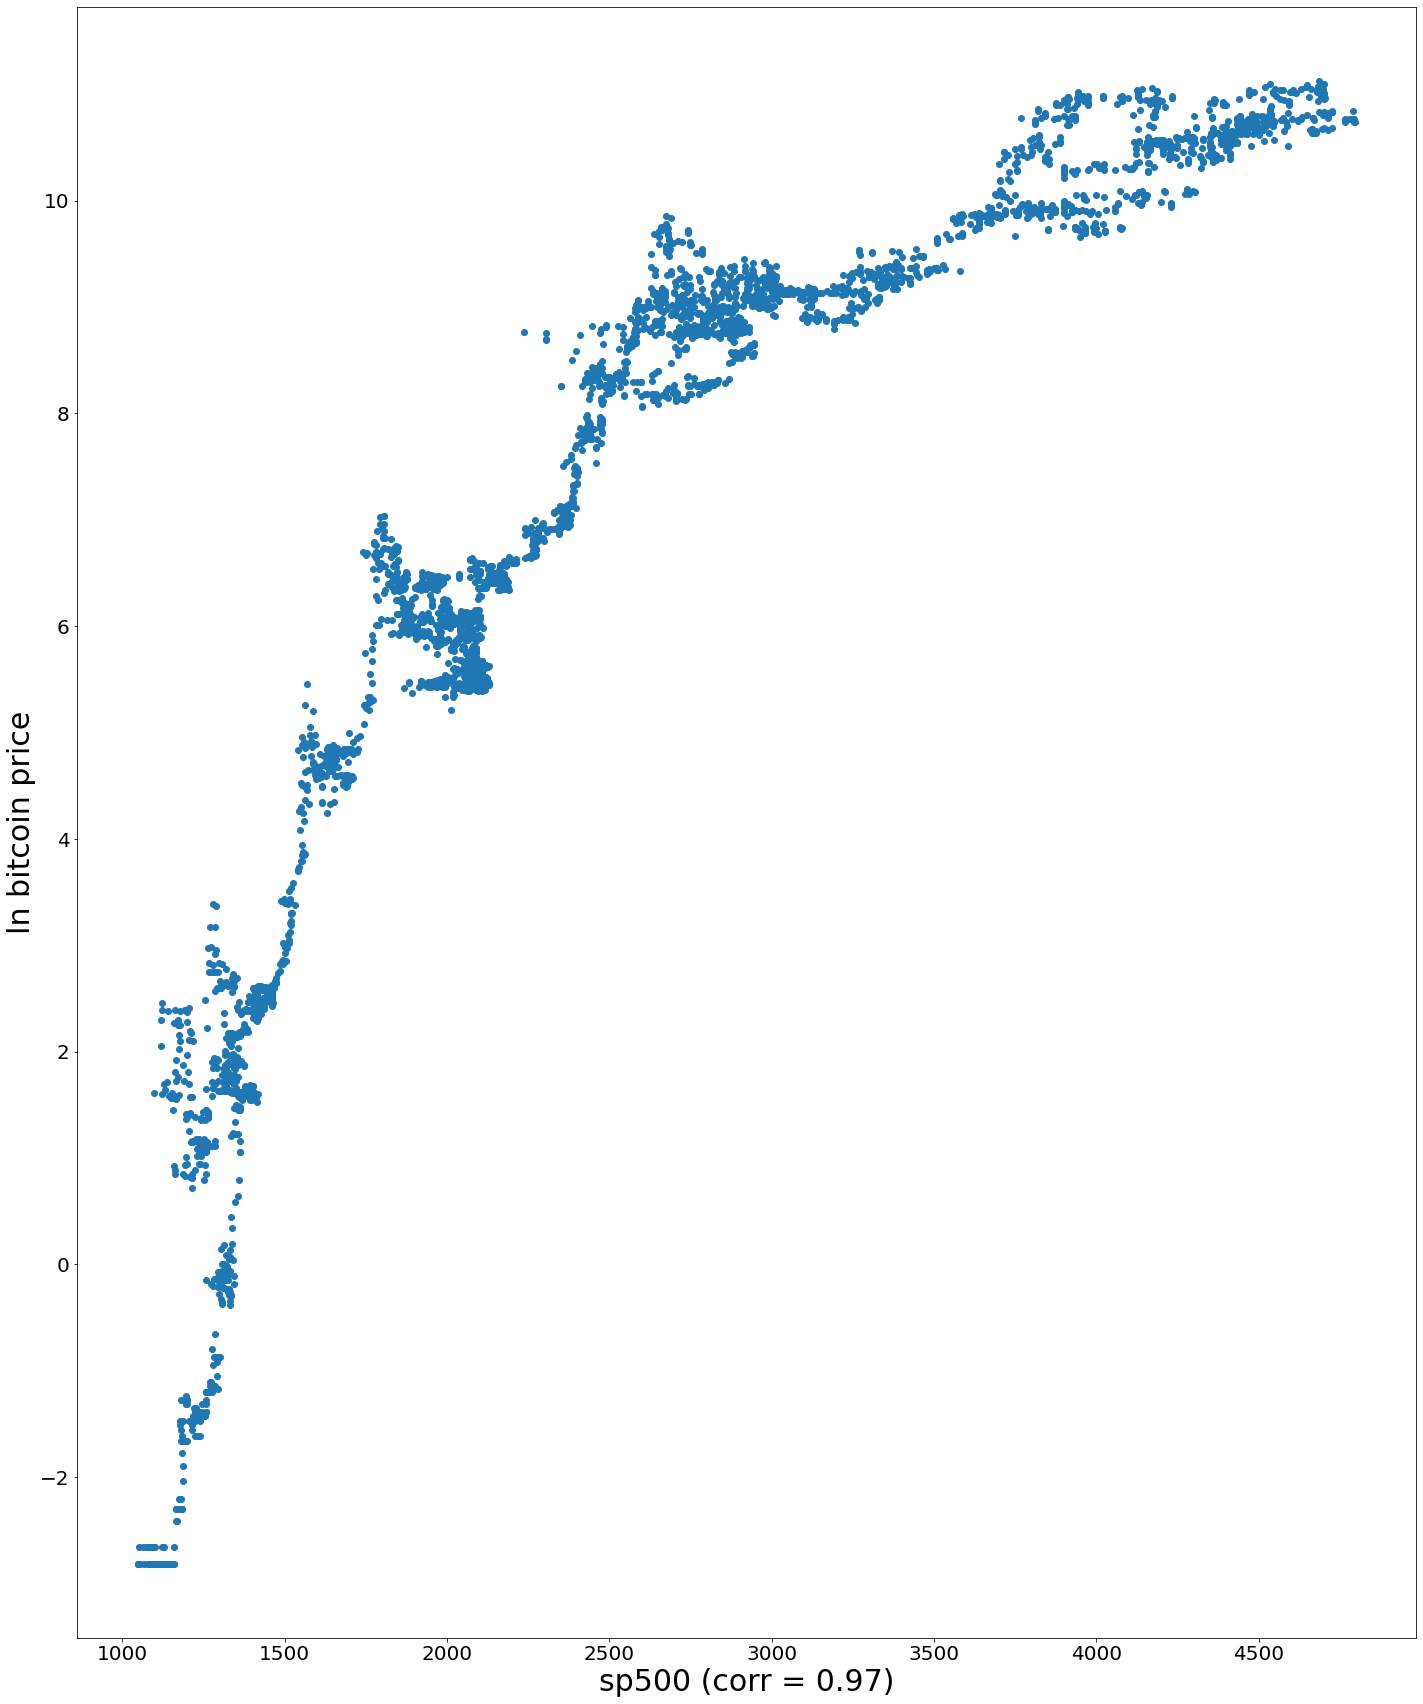

In [34]:
# plot correlation graph
fig, ax = plt.subplots()

ax.plot(df_X['sp500'],df_X['ln_bitcoin_price'],'o')

ax.set_ylabel('ln bitcoin price',fontsize = 30)
ax.set_xlabel('sp500 (corr = 0.97)',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend(fontsize = 15)
plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

In [35]:
#The following function is borrowed from :  Dmitriy Sergeyev, Data Scientist @ Zeptolab, lecturer in the Center of Mathematical Finance in MSU
#https://mlcourse.ai/articles/topic9-part1-time-series/

import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries pandas series
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Agumented Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

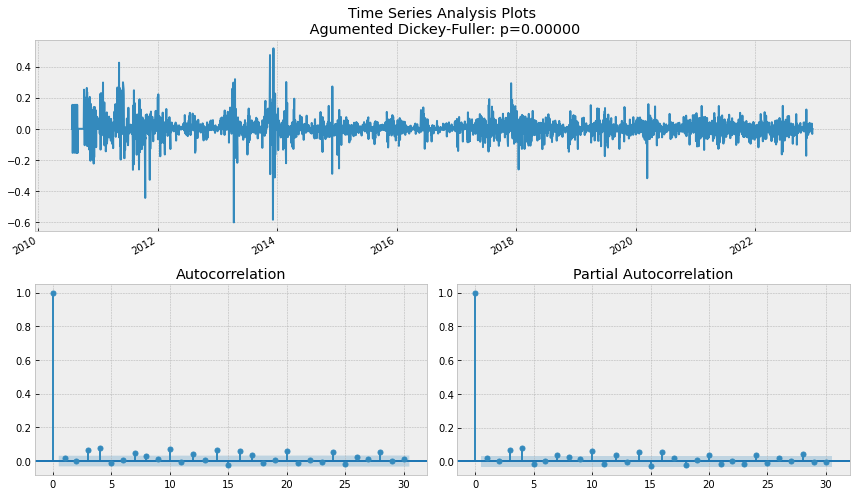

In [36]:
# time-series analysis of Bitcoin price return
tsplot(df_X['ln_bitcoin_return'], lags=30)

# SVM analysis

### prepare data

In [37]:
# put data together
X = df_X[['ln_bitcoin_price','ln_bitcoin_return-1','ln_bitcoin_return-2','ln_bitcoin_return-3','ln_bitcoin_return-4','ln_bitcoin_return-5','sp500','GDP_growth','DTB3','T10','UNRATE','inflation_rate','BOPGSTB']]

In [38]:
# get binary bubble data
bubble = pd.read_csv(direction + 'BTCbubble.csv')
bubble = bubble.set_index('Date')
bubble.index = pd.to_datetime(list(bubble.index))
bubble = bubble[['Bubble2010/7/19']]
bubble

,Bubble2010/7/19
2010-07-20,0.0
2010-07-21,0.0
2010-07-22,0.0
2010-07-23,0.0
2010-07-26,0.0
...,...
2022-12-14,1.0
2022-12-15,1.0
2022-12-16,1.0
2022-12-17,1.0


In [39]:
# put the data together and only keep dates which both datasets have
df = pd.concat([X,bubble], axis=1, join='inner')

In [40]:
df

,ln_bitcoin_price,ln_bitcoin_return-1,ln_bitcoin_return-2,ln_bitcoin_return-3,ln_bitcoin_return-4,ln_bitcoin_return-5,sp500,GDP_growth,DTB3,T10,UNRATE,inflation_rate,BOPGSTB,Bubble2010/7/19
2010-07-27,-2.813411,0.000000,0.182322,-0.470004,0.133531,-0.133531,1113.84,0.010717,0.15,3.08,9.4,0.000211,-41609.0,0.0
2010-07-28,-2.813411,0.000000,0.000000,0.182322,-0.470004,0.133531,1106.13,0.010717,0.15,3.03,9.4,0.000211,-41609.0,0.0
2010-07-29,-2.659260,0.000000,0.000000,0.000000,0.182322,-0.470004,1101.53,0.010717,0.15,3.03,9.4,0.000211,-41609.0,0.0
2010-07-30,-2.813411,0.154151,0.000000,0.000000,0.000000,0.182322,1101.60,0.010717,0.15,2.94,9.4,0.000211,-41609.0,0.0
2010-08-02,-2.813411,-0.154151,0.154151,0.000000,0.000000,0.000000,1125.86,0.010717,0.16,2.99,9.5,0.001380,-45619.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14,9.788576,0.033445,0.003640,-0.000816,0.000938,-0.004129,3995.32,0.017685,4.23,3.39,3.7,0.002148,-78162.0,1.0
2022-12-15,9.764204,0.003759,0.033445,0.003640,-0.000816,0.000938,3895.75,0.017685,4.22,3.32,3.7,0.002148,-78162.0,1.0
2022-12-16,9.731391,-0.024372,0.003759,0.033445,0.003640,-0.000816,3852.36,0.017685,4.22,3.39,3.7,0.002148,-78162.0,1.0
2022-12-17,9.724271,-0.032814,-0.024372,0.003759,0.033445,0.003640,3852.36,0.017685,4.22,3.39,3.7,0.002148,-78162.0,1.0


In [41]:
# only select the features we want
X = df[['ln_bitcoin_return-1','ln_bitcoin_return-2','ln_bitcoin_return-3','ln_bitcoin_return-4','ln_bitcoin_return-5','sp500','GDP_growth','DTB3','T10','UNRATE','inflation_rate','BOPGSTB']]
X

,ln_bitcoin_return-1,ln_bitcoin_return-2,ln_bitcoin_return-3,ln_bitcoin_return-4,ln_bitcoin_return-5,sp500,GDP_growth,DTB3,T10,UNRATE,inflation_rate,BOPGSTB
2010-07-27,0.000000,0.182322,-0.470004,0.133531,-0.133531,1113.84,0.010717,0.15,3.08,9.4,0.000211,-41609.0
2010-07-28,0.000000,0.000000,0.182322,-0.470004,0.133531,1106.13,0.010717,0.15,3.03,9.4,0.000211,-41609.0
2010-07-29,0.000000,0.000000,0.000000,0.182322,-0.470004,1101.53,0.010717,0.15,3.03,9.4,0.000211,-41609.0
2010-07-30,0.154151,0.000000,0.000000,0.000000,0.182322,1101.60,0.010717,0.15,2.94,9.4,0.000211,-41609.0
2010-08-02,-0.154151,0.154151,0.000000,0.000000,0.000000,1125.86,0.010717,0.16,2.99,9.5,0.001380,-45619.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14,0.033445,0.003640,-0.000816,0.000938,-0.004129,3995.32,0.017685,4.23,3.39,3.7,0.002148,-78162.0
2022-12-15,0.003759,0.033445,0.003640,-0.000816,0.000938,3895.75,0.017685,4.22,3.32,3.7,0.002148,-78162.0
2022-12-16,-0.024372,0.003759,0.033445,0.003640,-0.000816,3852.36,0.017685,4.22,3.39,3.7,0.002148,-78162.0
2022-12-17,-0.032814,-0.024372,0.003759,0.033445,0.003640,3852.36,0.017685,4.22,3.39,3.7,0.002148,-78162.0


In [42]:
# target
y = df[['Bubble2010/7/19']]
y

,Bubble2010/7/19
2010-07-27,0.0
2010-07-28,0.0
2010-07-29,0.0
2010-07-30,0.0
2010-08-02,0.0
...,...
2022-12-14,1.0
2022-12-15,1.0
2022-12-16,1.0
2022-12-17,1.0


In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [44]:
# train and test set
X_train = X[:np.int(len(X)*0.8)]
y_train = y[:np.int(len(X)*0.8)]
X_test = X[np.int(len(X)*0.8):]
y_test = y[np.int(len(X)*0.8):]

In [45]:
print(len(X_train),len(X_test))

3038 760


### fit model and get accuracy

In [46]:
# the function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)/len(y_true) * 100

In [47]:
# # get the best parameters

# pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC())])

# param_grid = {'svc__C':np.logspace(-4, 3, num=10, endpoint = True)}
# grid_search_object = GridSearchCV(pipe, param_grid, cv=5, scoring="neg_mean_absolute_error")

# grid_search_object.fit(X_train, y_train)

In [48]:
# predictions_train = grid_search_object.predict(X_train) # interpolate
# predictions_test = grid_search_object.predict(X_test) # forecast
# train_score = accuracy(y_train[y_train.columns[0]], predictions_train) # calculate the MAD/MEAN ratio error of predictions_train
# test_score = accuracy(y_test[y_test.columns[0]], predictions_test) # calculate the MAD/MEAN ratio error of predictions_test
# print("Train set MAD mean ratio score: {:.2f}".format(train_score))
# print("Test set MAD mean ratio score: {:.2f}".format(test_score))

In [49]:
# get the accuracy for both training set and test set and for each selected C
c_list = [0.01,0.1,1,10,33,55,78,100,1000]
score_table = pd.DataFrame(columns = [['C','train','test']],index = [i for i in range(len(c_list))])
for i in range(len(c_list)):
    c = c_list[i]
    svc = Pipeline([('scaler', StandardScaler()),('svm_clf', SVC(C=c))])
    svc = svc.fit(X_train, y_train)
    predictions_train = svc.predict(X_train) # interpolate
    predictions_test = svc.predict(X_test) # forecast
    train_score = accuracy(y_train[y_train.columns[0]], predictions_train) # calculate the MAD/MEAN ratio error of predictions_train
    test_score = accuracy(y_test[y_test.columns[0]], predictions_test) # calculate the MAD/MEAN ratio error of predictions_test
    score_table.iloc[i,0] = c
    score_table.iloc[i,1] = train_score
    score_table.iloc[i,2] = test_score

In [50]:
score_table

,C,train,test
0,0.01,75.181,100
1,0.1,85.7801,100
2,1,94.4042,100
3,10,98.9467,99.4737
4,33,99.8354,97.6316
5,55,99.9342,95
6,78,100,92.6316
7,100,100,91.9737
8,1000,100,92.1053


In [51]:
# plot the test set with C=10 as an example
svc = Pipeline([('scaler', StandardScaler()),('svm_clf', SVC(C=10))])
svc = svc.fit(X_train, y_train)
predictions_train = svc.predict(X_train) # interpolate
predictions_test = svc.predict(X_test) # forecast

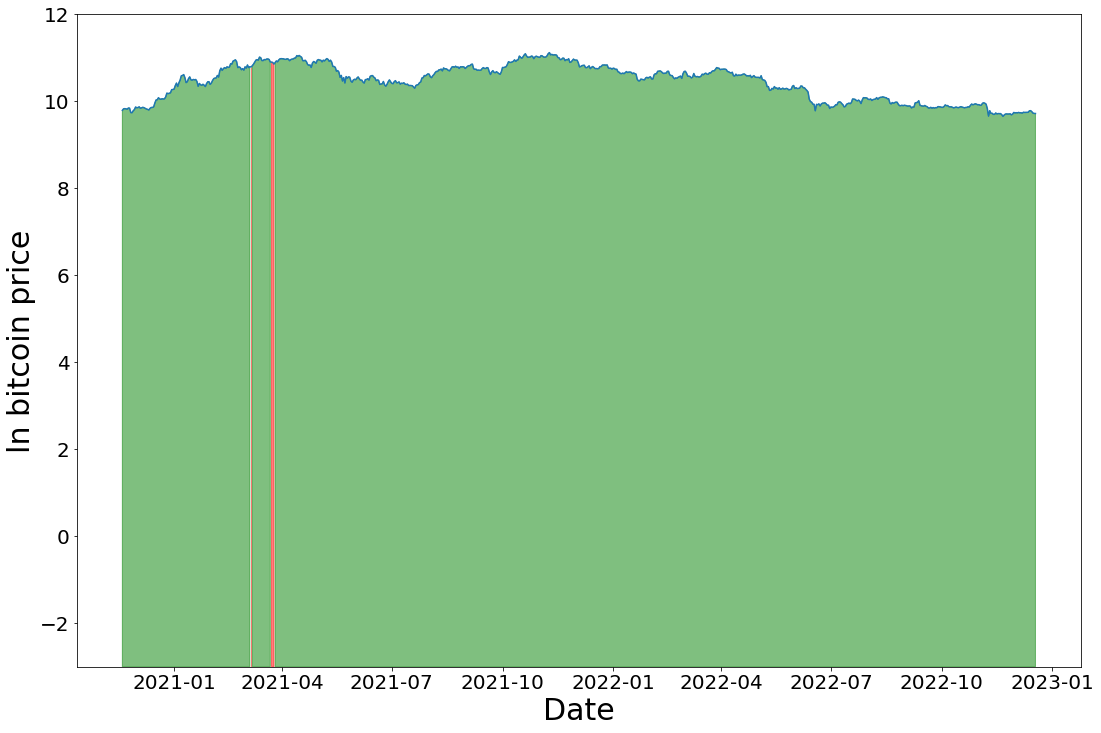

In [52]:
ts = y_test.index
fig, ax = plt.subplots()

ax.plot(df['ln_bitcoin_price'][-len(ts):])
ax.set_ylim(-3, 12)
ax.fill_between(ts, -3, df['ln_bitcoin_price'][-len(ts):], where = predictions_test == 1, color='green', alpha=0.5)
ax.fill_between(ts, -3, df['ln_bitcoin_price'][-len(ts):], where = predictions_test == 0, color='red', alpha=0.5)

ax.set_ylabel('ln bitcoin price',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.rcParams['figure.figsize'] = (18.0, 12.0)       # set size of figure
plt.show()

Green means correct prediction and red means wrong prediction.